In [260]:
homedir = os.getenv("HOME")

#general Virgo v2 table
vf_full = Table.read(homedir+'/Desktop/galfit_files/VF_WISESIZE_v2.fits')
#general Virgo v2 env table
env_full = Table.read(homedir+'/Desktop/v2-20220820/vf_v2_environment.fits')

In [261]:
#divide subsample into environments

vf = vf_full[vf_full['subsample_flag']]
env = env_full[vf_full['subsample_flag']]

vf_cluster = vf[env['cluster_member']]
vf_rg = vf[env['rich_group_memb']]   #only galaxies in rich groups --> not in filaments, etc.
vf_fil = vf[env['filament_member']]
vf_pg = vf[env['poor_group_memb']]
vf_field = vf[env['pure_field']]

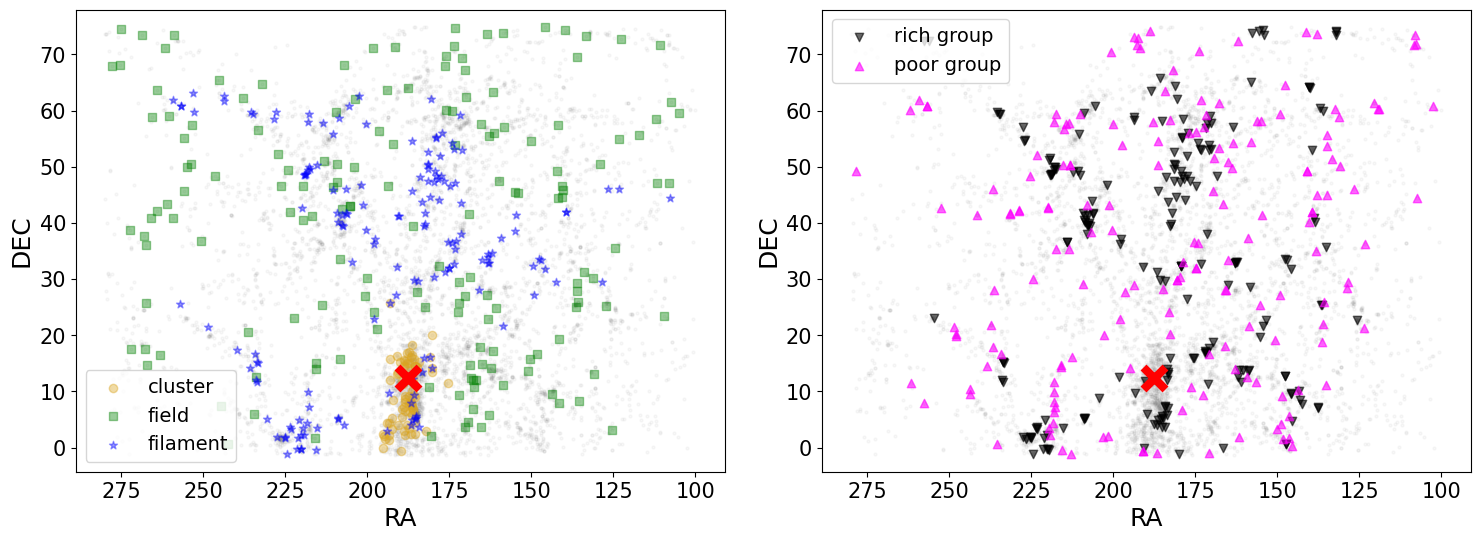

In [262]:
vf_env = [vf_cluster,vf_field,vf_fil]
vf_group = [vf_rg,vf_pg]
vf_label = ['cluster','field','filament']
group_label = ['rich group','poor group']
markers = ['o','s','*']
markers_group = ['v','^']
vf_color=['goldenrod','green','blue']
group_color=['black','magenta']

fig=plt.figure(figsize=(18,6))

plt.subplots_adjust(hspace=.2,wspace=.15)
        
for n in range(0,2):
    ax=fig.add_subplot(1,2,n+1)

    ax.scatter(vf_full['RA'],vf_full['DEC'],s=5,alpha=0.05,color='gray')
    #ax.scatter([187.7],[12.34],color='black',marker='x',s=100)
    
    plt.gca().invert_xaxis()
    plt.ylabel('DEC',fontsize=18)
    plt.xlabel('RA',fontsize=18)
    if n==0:
        for i in range(len(vf_env)):
            plt.scatter(vf_env[i]['RA'],vf_env[i]['DEC'],marker=markers[i],
                        label=vf_label[i],alpha=0.4,color=vf_color[i])
            plt.xticks(fontsize=15)
            plt.yticks(fontsize=15)
    if n==1:
        for i in range(len(vf_group)):
            plt.scatter(vf_group[i]['RA'],vf_group[i]['DEC'],marker=markers_group[i],
                        label=group_label[i],alpha=0.6,color=group_color[i])
            plt.xticks(fontsize=15)
            plt.yticks(fontsize=15)
        
    ax.scatter([187.7],[12.34],color='red',marker='x',s=250, linewidths=6)
    plt.ylim(np.min(vf_full['DEC'])-3,np.max(vf_full['DEC'])+3)
    ax.legend(fontsize=14)

plt.savefig(homedir+'/Desktop/radec_env.png',dpi=150,bbox_inches='tight', pad_inches=0.2)
     
plt.show()

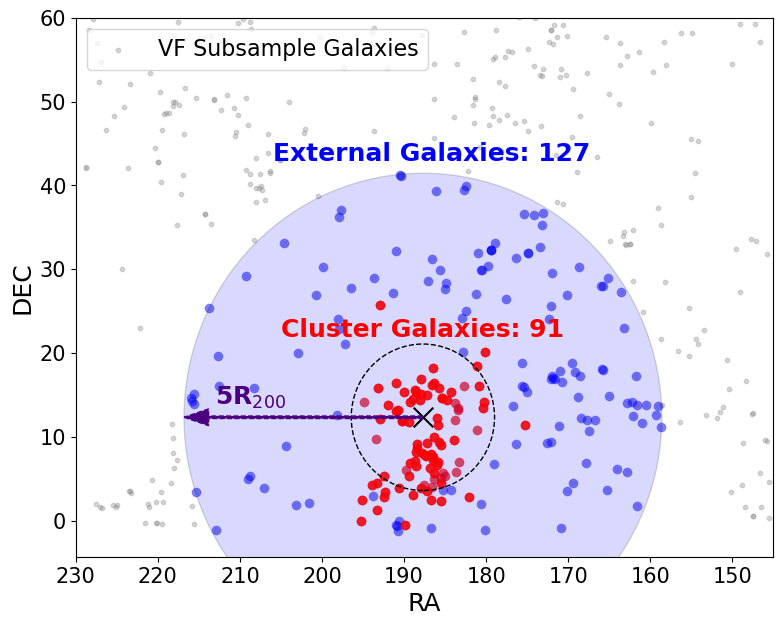

In [28]:
#nser = Table.read(homedir+'/output_params_r_psf.fits')['nsersic']

RA_center = 187.70
DEC_center = 12.34
virial_radius = 5.8224 #(degrees)

onept5_vir = 1.5*virial_radius
five_vir = 5*virial_radius

fig, ax = plt.subplots(figsize=(9,7))
dist = np.sqrt((vf['RA']-RA_center)**2 + (vf['DEC']-DEC_center)**2)
virial_1pt5flag = (dist<=onept5_vir)
#virial_5flag = ((dist>virial_radius)&(dist<=five_vir))
virial_5flag = (dist>onept5_vir)&(dist<=five_vir)

clus_flag = (env['cluster_member']) | (virial_1pt5flag)
infall_flag = virial_5flag & (~env['cluster_member'])

plt.scatter(vf['RA'],vf['DEC'],alpha=0.3,s=10,color='gray',label='VF Subsample Galaxies')
#plt.scatter(vf['RA'][virial_1flag],vf['DEC'][virial_1flag],alpha=0.6,color='red')
plt.scatter(vf['RA'][infall_flag],vf['DEC'][infall_flag],alpha=0.4,color='blue')
plt.scatter(vf['RA'][clus_flag],vf['DEC'][clus_flag],alpha=0.6,color='red')

#circle_oneVR = plt.Circle((RA_center,DEC_center),virial_radius,facecolor='blue',edgecolor='black',alpha=0.15)
#ax.add_patch(circle_oneVR)
circle_fiveVR = plt.Circle((RA_center,DEC_center),virial_radius*5,facecolor='blue',edgecolor='black',alpha=0.15)
ax.add_patch(circle_fiveVR)

plt.scatter(vf['RA'][env['cluster_member']],vf['DEC'][env['cluster_member']],alpha=0.6,color='red')

#plt.title(r'Virgo cluster galaxies and those 1.5-5R$_{200}$',fontsize=20)

plt.ylim(np.min(vf_full['DEC'])-3,60)
plt.xlim(230,145)

plt.ylabel('DEC',fontsize=18)
plt.xlabel('RA',fontsize=18)

ax.scatter([187.7],[12.34],color='black',marker='x',s=200)

circle_onept5VR = plt.Circle((RA_center,DEC_center),virial_radius*1.5,facecolor='none',edgecolor='black',linestyle='--')
ax.add_patch(circle_onept5VR)

plt.arrow(RA_center, DEC_center, five_vir, 0, color='indigo', linestyle="--", length_includes_head=True,
          head_width=2, head_length=3, width=0.3)
plt.text(213,13.8,r'5R$_{200}$',color='indigo',fontsize=18,weight='bold')

#plt.text(204,43,f'Infalling Galaxies: {len(vf[infall_flag & (nser<2)])}',color='blue',weight='bold',fontsize=18)
#plt.text(203,22,f'Cluster Galaxies: {len(vf[clus_flag & (nser<2)])}',color='red',weight='bold',fontsize=18)

plt.text(206,43,f'External Galaxies: {len(vf[infall_flag])}',color='blue',weight='bold',fontsize=18)
plt.text(205,22,f'Cluster Galaxies: {len(vf[clus_flag])}',color='red',weight='bold',fontsize=18)


plt.xticks(fontsize=15)
plt.yticks(fontsize=15)    

plt.legend(fontsize=16,loc='upper left')

plt.savefig(homedir+'/Desktop/VF_infallcore.png', bbox_inches='tight', pad_inches=0.2, dpi=100)

#len(vf[env['cluster_member']&(nser<2)])

plt.show()

------------

In [368]:
#data analysis

In [263]:
#no more error text. >:/
import warnings
warnings.filterwarnings('ignore')

%run ~/github/research/data_analysis/re_analysis.py
cat = catalogs(conv=True,MeanMedian='median',MADmultiplier=5000,cutAGN=True,W1=True)

#cat.r12_vs_rstar(savefig=True)

#cat.env_means(mass_match=False,trimOutliers=False,errtype='bootstrap',r90=False,savefig=True)   #for MADmultiplier=5000 and trimOutliers=True, removes the pesky outlier galaxy
#cat.env_means_comp(savefig=False,trimOutliers=False,errtype='sterr')

#cat.mass_hist(z0mgs_comp=False,savefig=True)
#cat.envbins(savefig=False)

#cat.sfrmstar_magphys(show_HI=False,show_sizerat=True,show_D25=False,savefig=True)
#cat.sfrmstar_z0mgs(show_HI=False,show_sizerat=False,show_D25=True,savefig=True)
#cat.ratio_MS(showHI=False,savefig=True)

#cat.hist_dist_rats(savefig=True)
#cat.mass_hist_oneplot(savefig=True)
#cat.ndensity_hist_oneplot(fullsample=False,savefig=True)

#cat.wisesize_mass(nbins=5,savefig=True)

#cat.inclination_check(savefig=False)
#cat.mass_completeness_check(savefig=False)
#cat.mass_matching()

Convolution:  True
AGN cut from sample.
fraction AGN in VF subsample (before filtering out GALFIT errors): 0.188
Number of galaxies flagged with AGN *AND* a GALFIT error: 28

No GALFIT data for 42 w3 galaxies, 15 w1 galaxies, and 6 r galaxies.
Total number of galaxies with GALFIT errors or error flags: 132
Total number of galaxies with nser>6: 88

Total number of subsample galaxies remaining: 409


USAGE:
    lcs = catalogs(MeanMedian='mean',cutAGN=False,W1=False) --> initiate catalog class. 
        MeanMedian will propagate to all plots; can either be 'mean' or 'median.' cutAGN
        will do precisely that, flagging both BPT AGN and AGN based on WISE magnitude colors.
        Conv=True is the default.
    lcs.wisesize_hist(savefig=False) --> generates vertically-oriented histogram subplots of 
        R12/Rr or R12/R3.4 distribution, separated into cluster vs. all else (external).
    lcs.LCS_hist(ReDisk='Re',savefig=False) --> generates same type of histogram plot as above but with 
        the actual LCS values. 'Re' or 'Disk' to instruct which column to use for size ratios.
    lcs.wisesize_mass(savefig=False) --> generates scatterplot of size ratio vs. mass bin using 
        LCS data, the format being similar to a skeleton version of Figure 13 from Finn+18. 
        Masses are from MAGPHYS SED fitting using photometry from John Moustakas. 
    lcs.wisesize_mass(nbins=3, 

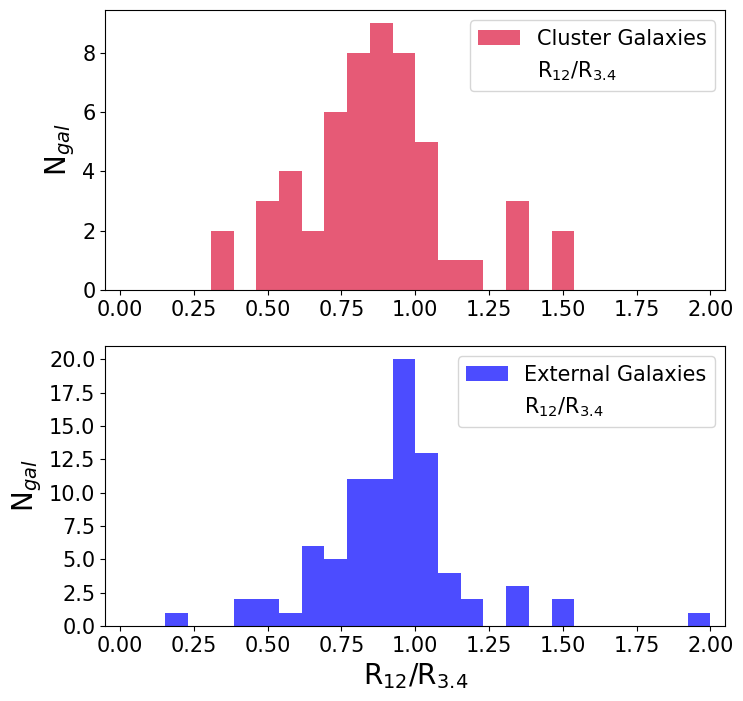


K-S p-value (> 0.003, "same distribution"):
0.10160

Mean core size ratio: 0.913
Median core size ratio: 0.884
Mean external size ratio: 0.955
Median external size ratio: 0.931

Core mean/median uncertainty: 0.055
External mean/median uncertainty: 0.026


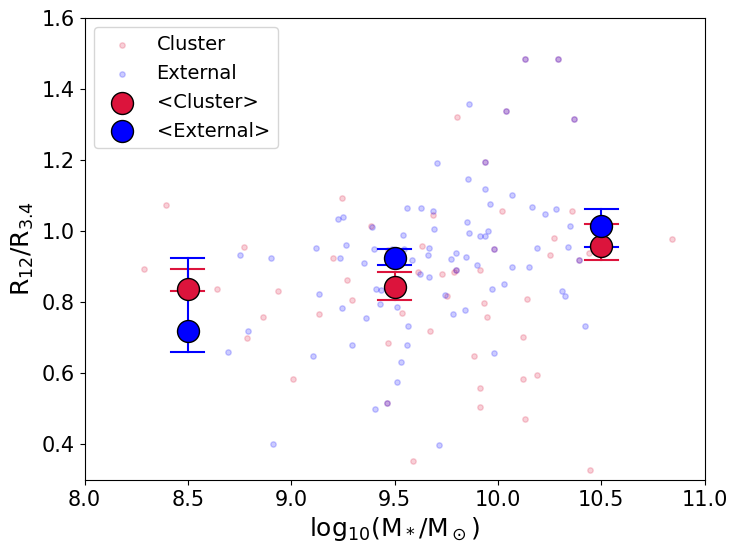

In [289]:
%run ~/github/research/data_analysis/LCS_comparison.py
lcs = catalogs(MeanMedian='median',cutAGN=True,W1=True)
lcs.wisesize_hist(savefig=True)
lcs.wisesize_mass(nbins=3,savefig=True)

In [372]:
magphys = Table.read(homedir+'/Desktop/v2-20220820/vf_v2_magphys_07-Jul-2022.fits')
magphys_cut = Table.read(homedir+'/Desktop/v2-20220820/vf_v2_magphys_07-Jul-2022.fits')[(magphys['magphysFlag']) & (vf_full['sgacut_flag'])]
magphys = magphys[(magphys['magphysFlag'])]

In [375]:
def colormass(x1,y1,x2,y2,name1,name2, figname='test',contourflag=False, \
             xmin=6, xmax=11.6, ymin=-3, ymax=2, contour_bins = 40, ncontour_levels=5,\
              xlabel=r'$\rm \log_{10}(M_\star/M_\odot) $', ylabel=r'$\rm \log_{10}(SFR/(M_{\odot}/yr)) $', 
              color1='black',color2='red',\
              nhistbin=50, alpha1=.4,alphagray=.01,marker2='o',\
              plot_top_histogram=True):

    if plot_top_histogram:
        fig = plt.figure(figsize=(8,8))
    else:
        fig = plt.figure(figsize=(8,5))
    
    
    plt.subplots_adjust(left=.15,bottom=.15)
    if plot_top_histogram:
        nrow = 4
        ncol = 4
    else:
        nrow = 3
        ncol = 4
    
    # for purposes of this plot, only keep data within the 
    # window specified by [xmin:xmax, ymin:ymax]
    
    keepflag1 = (x1 >= xmin) & (x1 <= xmax) & (y1 >= ymin) & (y1 <= ymax)
    keepflag2 = (x2 >= xmin) & (x2 <= xmax) & (y2 >= ymin) & (y2 <= ymax)
    
    x1 = x1[keepflag1]
    y1 = y1[keepflag1]
    
    x2 = x2[keepflag2]
    y2 = y2[keepflag2]
    n1 = sum(keepflag1)
    n2 = sum(keepflag2)
    
    if plot_top_histogram:
        ax1 = plt.subplot2grid((nrow,ncol),(1,0),rowspan=nrow-1,colspan=ncol-1, fig=fig)
    else:
        ax1 = plt.subplot2grid((nrow,ncol),(0,0),rowspan=nrow,colspan=ncol-1, fig=fig)        

    label=name1
        
    plt.plot(x1,y1,'k.',alpha=alphagray,label=label, zorder=1,markersize=8)        
    
    label=name2
    plt.plot(x2,y2,'ro',alpha=alpha1, label=label,markersize=8,mec='k')
        
    plt.legend(loc='upper left',fontsize=13)

    plt.axis([xmin,xmax,ymin,ymax])
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(xlabel,fontsize=26)
    plt.ylabel(ylabel,fontsize=26)
    plt.gca().tick_params(axis='both', labelsize=16)

    # add the top histogram
    if plot_top_histogram:
        ax2 = plt.subplot2grid((nrow,ncol),(0,0),rowspan=1,colspan=ncol-1, fig=fig, sharex = ax1) #, yticks=[]
        print('just checking ...',len(x1),len(x2))
        print(min(x1))
        print(min(x2))
        minx = min([min(x1),min(x2)])
        maxx = max([max(x1),max(x2)])    
        mybins = np.linspace(minx,maxx,nhistbin)
        
        t = plt.hist(x1, density=False, bins=mybins,color=color1,histtype='step',lw=1.5, label=name1)
        t = plt.hist(x2, density=False, bins=mybins,color=color2,histtype='step',lw=1.5, label=name2)

        ax2.xaxis.tick_top()
        ax2.tick_params(axis='both', labelsize=16)


    # add the side histogram
    if plot_top_histogram:
        ax3 = plt.subplot2grid((nrow,ncol),(1,ncol-1),rowspan=nrow-1,colspan=1, fig=fig, sharey = ax1)
    else:
        ax3 = plt.subplot2grid((nrow,ncol),(0,ncol-1),rowspan=nrow,colspan=1, fig=fig, sharey = ax1)      
    miny = min([min(y1),min(y2)])
    maxy = max([max(y1),max(y2)])    
    mybins = np.linspace(miny,maxy,nhistbin)

    
    t=plt.hist(y1, density=False, orientation='horizontal',bins=mybins,color=color1,histtype='step',lw=1.5, label=name1)
    t=plt.hist(y2, density=False, orientation='horizontal',bins=mybins,color=color2,histtype='step',lw=1.5, label=name2)

    plt.yticks(rotation='horizontal')
    ax3.yaxis.tick_right()
    ax3.tick_params(axis='both', labelsize=16)

just checking ... 6139 551
5.701999474889637
6.244277120801843


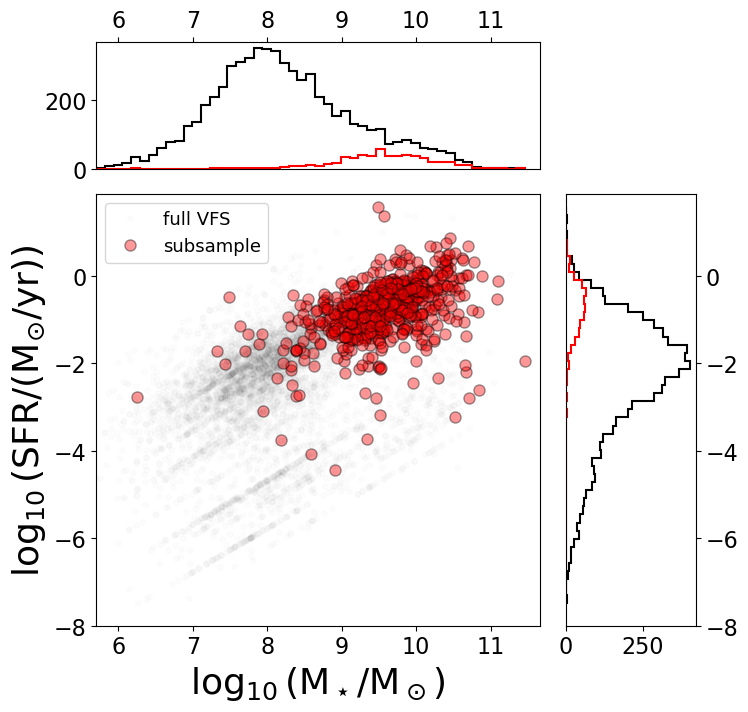

In [376]:
x1=magphys['logMstar']
y1=magphys['logSFR']
x2=magphys_cut['logMstar']
y2=magphys_cut['logSFR']
name1='full VFS'
name2='subsample'

colormass(x1,y1,x2,y2,name1,name2,
          xmin=5.7,xmax=np.max(x2)+0.2,ymin=-8,ymax=np.max(y2)+0.3,figname='test')

- ran 500 iterations of mass-matching, calculated size ratio medians for each environment bin (meaning I would have 500 medians for each bin, corresponding to the sizes of mass-matched galaxies after each iteration). I then evaluated the median of these medians and plotted this with standard deviation. I did likewise with the "means" of the medians with standard deviations, showing the spread of possible mean/medians values arising from mass-matching. 

- the cluster mean/median median is consistent, as to be expected. no error bars attached to the mean or median plot, given that there is no randomness associated with the choosing of the cluster galaxies (all other galaxies chosen randomly from a pool to match with the cluster galaxies).

- comparing the current median size ratio WRT environment plot to this median-of-medians figure, there is consistency (nearly not the case for the group galaxies). The mean is not as consistent.

In [2]:
#no more error text. >:/
import warnings
warnings.filterwarnings('ignore')

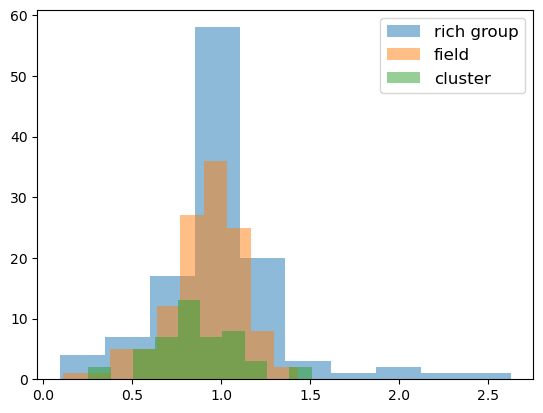

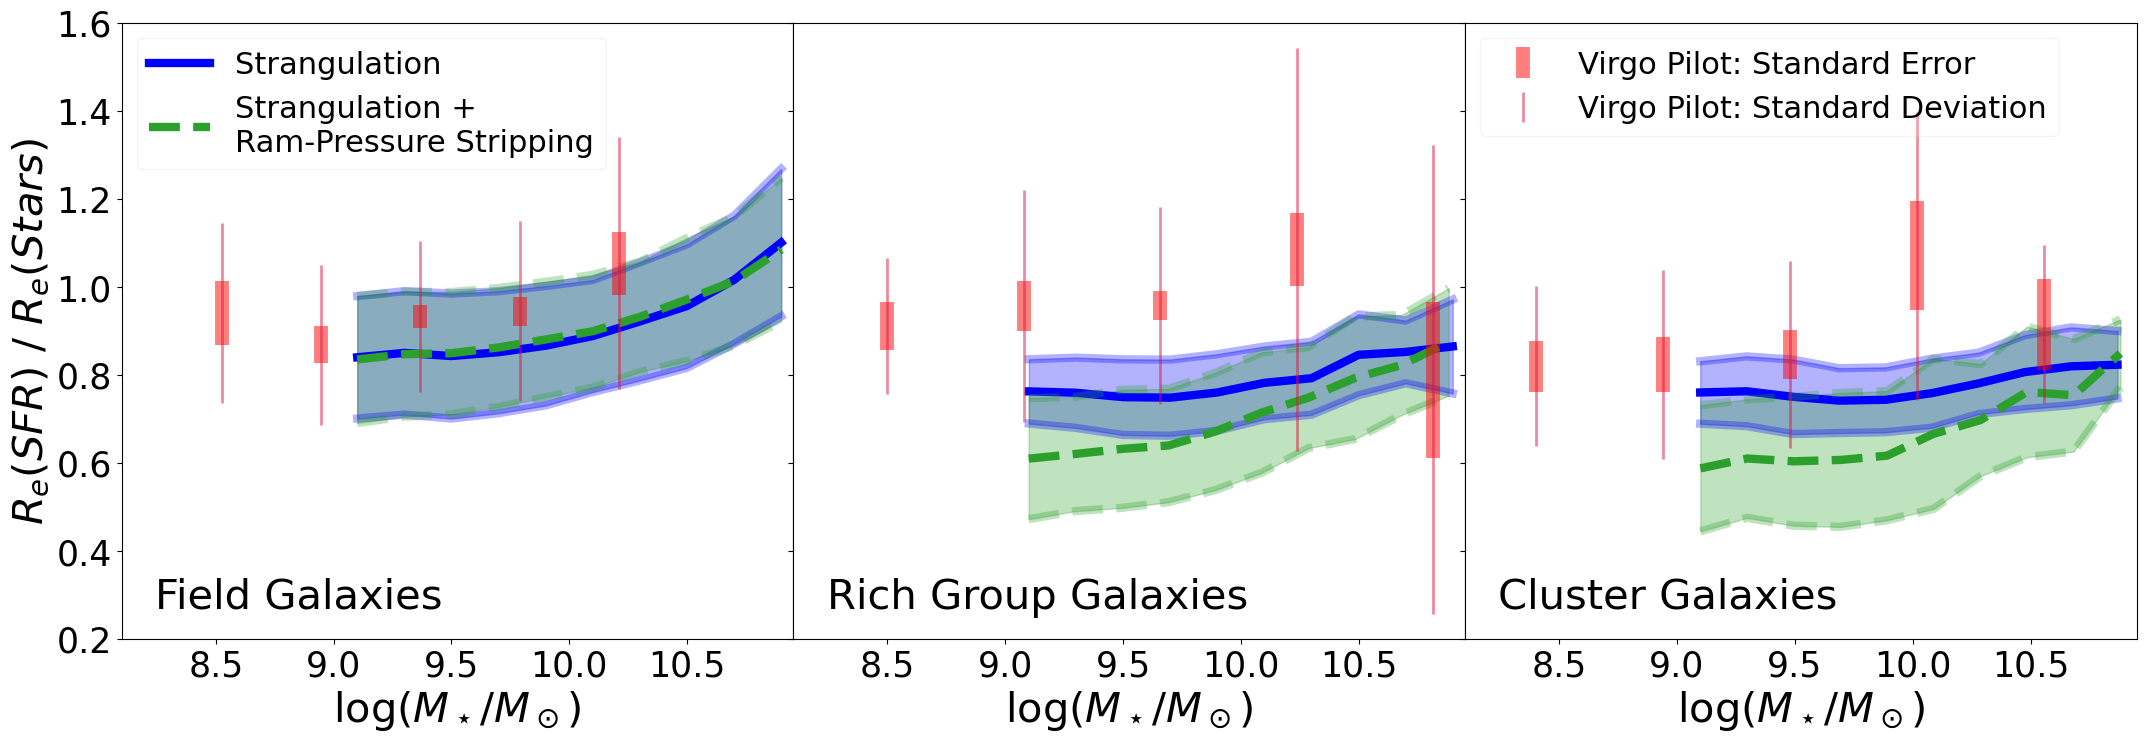

<Figure size 640x480 with 0 Axes>

In [738]:
#VFS masses from magphys

#LCS --> Re size ratio
#Masses from John Moustakas' SED fitting
%run /Users/k215c316/Desktop/Sim_pred_size/sim_plot_data_errorbars.py

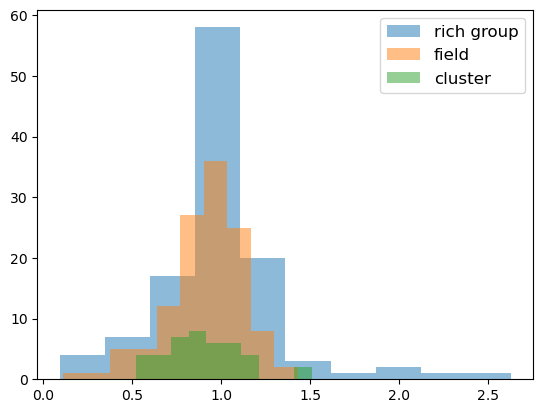

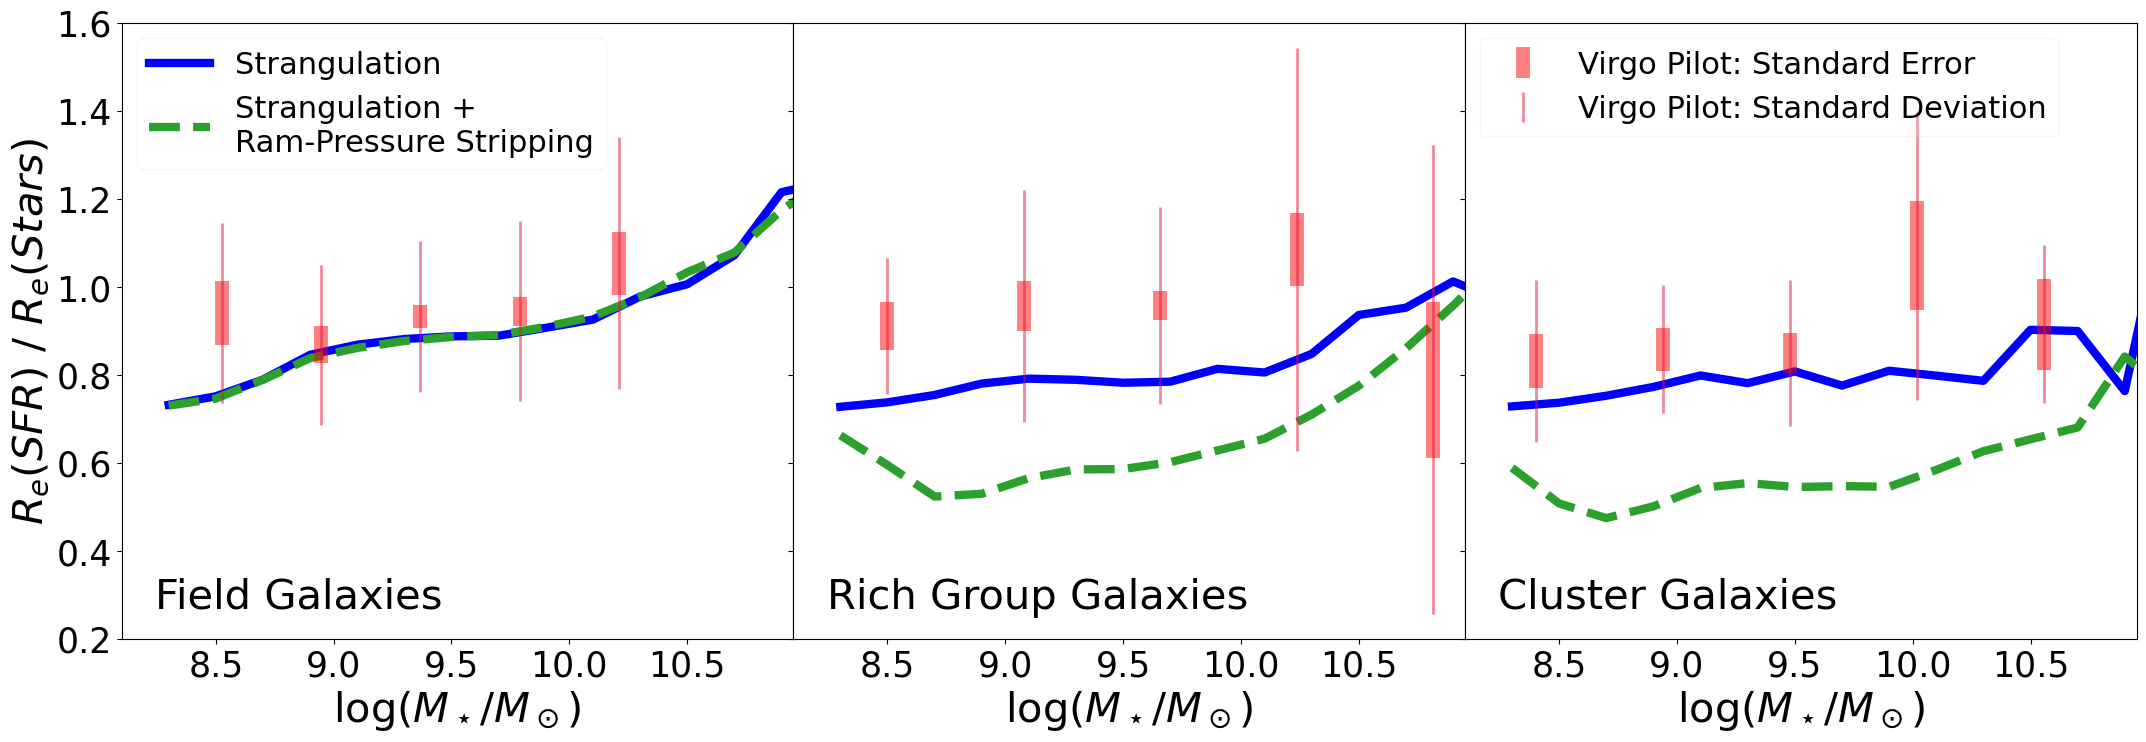

In [186]:
%run /Users/k215c316/Desktop/Sim_pred_size/sim_plot_data.py

Errors (VFS):

- STDs from scipy.stats.binned_statistic, calculated using size ratios in each mass bin
- divided by sqrt of number of galaxies in each bin
- did likewise for WISESize, but number of galaxies in each bin found by calculating the ratio of VFS galaxies in each bin divided by the total number of VFS subsample galaxies, multiplied by the total expected number of WISESize galaxies

Errors (SAMs):
- used MAD (median absolute deviation) of GAEA galaxy size ratio distributions

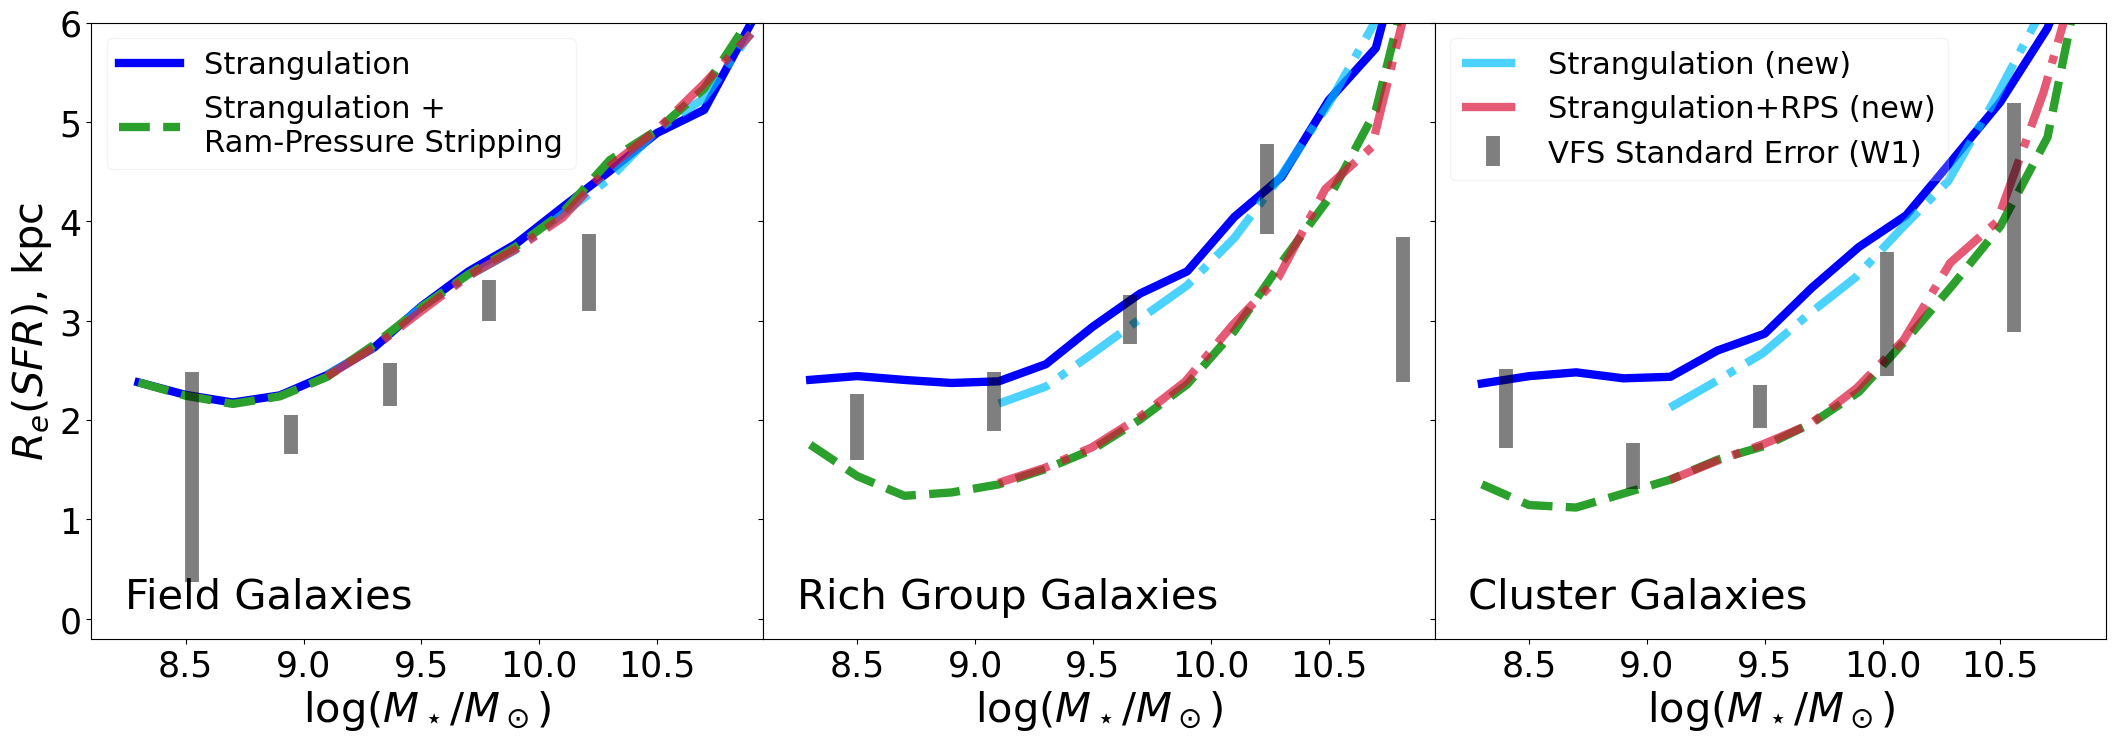

<Figure size 640x480 with 0 Axes>

In [783]:
#VFS masses from magphys

#LCS --> Re size ratio
#Masses from John Moustakas' SED fitting
%run /Users/k215c316/Desktop/Sim_pred_size/sim_plot_sfr-comp.py

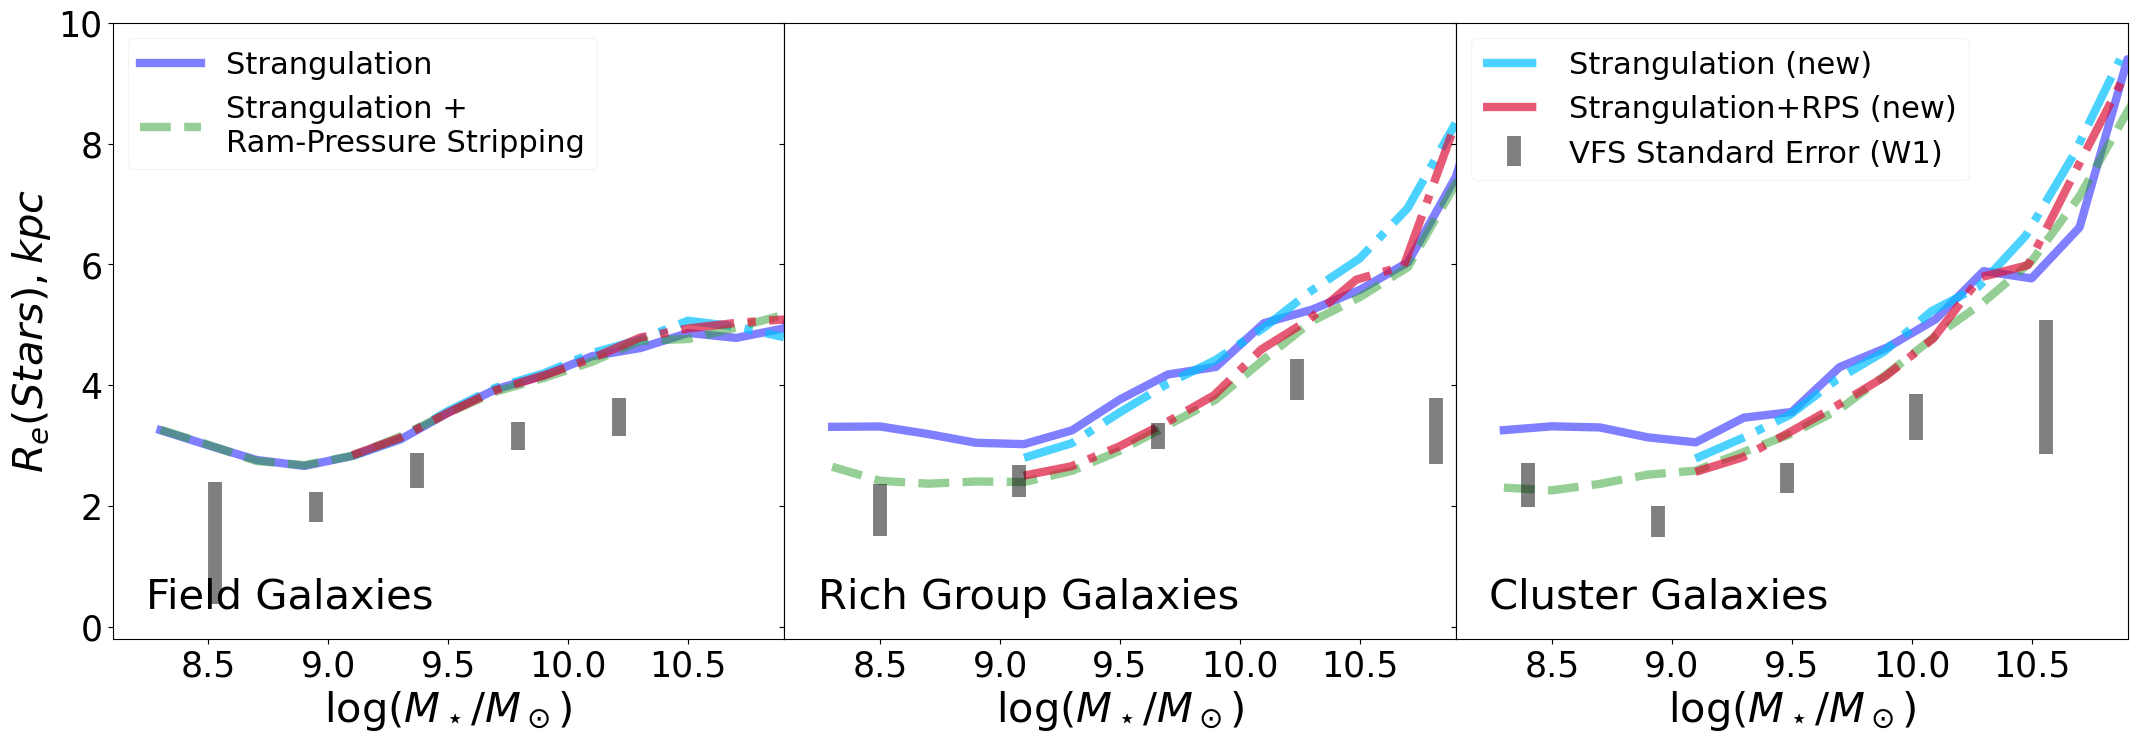

<Figure size 640x480 with 0 Axes>

In [799]:
#VFS masses from magphys

#LCS --> Re size ratio
#Masses from John Moustakas' SED fitting
%run /Users/k215c316/Desktop/Sim_pred_size/sim_plot_mstar-comp.py

# Scrap

In [842]:
from pygame import mixer

In [1002]:
path = os.getenv("HOME")+'/github/GUI_odyssey/success.mp3'
mixer.init()
mixer.music.set_volume(0.2)
mixer.music.load(path)
mixer.music.play()

In [926]:
magphys=Table.read(homedir+'/Desktop/v2-20220820/vf_v2_magphys_legacyExt_final.fits')

In [951]:
w1_new = Table.read(homedir+'/Desktop/galfit_files/galfit_W1_03112024.fits')
w3_new = Table.read(homedir+'/Desktop/galfit_files/galfit_W3_03112024.fits')

In [925]:
phot = Table.read(homedir+'/Desktop/v2-20220820/virgofilaments-v3b-legacyphot.fits')

### updating VF_WISESIZE.fits --> problematic VFID cases

In [969]:
#fascinating scenario --> group galaxy is not a primary galaxy, but its primary galaxy is not in subsample!
#VFID0025, VFID0483, VFID1291, VFID4046, VFID6115
#can still use their values, but cannot display on website. I think the time the edits need 
#is not worth the potential output.

#REMEMBER TO ADD BACK TO THE SUBSAMPLE EACH TIME THEY ARE REMOVED!

In [1054]:
add=True

index_flag = vfw['VFID']=='VFID0025'
vfw['subsample_flag'][index_flag]=add

index_flag = vfw['VFID']=='VFID0483'
vfw['subsample_flag'][index_flag]=add

index_flag = vfw['VFID']=='VFID1291'
vfw['subsample_flag'][index_flag]=add

index_flag = vfw['VFID']=='VFID4046'
vfw['subsample_flag'][index_flag]=add

index_flag = vfw['VFID']=='VFID6115'
vfw['subsample_flag'][index_flag]=add

In [1055]:
vfw.write(homedir+'/Desktop/galfit_files/VF_WISESIZE_v2.fits',overwrite=True)

In [160]:
vf=Table.read(homedir+'/Desktop/galfit_files/VF_WISESIZE_v2.fits')

In [161]:
trim = vf[vf['t_flag']&vf['SNRflag']&vf['SFRflag']]
len(trim)

658

In [162]:
len(trim[trim['SFRflag']])

658

In [228]:
magphys=Table.read(homedir+'/Desktop/galfit_files/vf-altphot.fits')

In [229]:
magphys[vf['VFID']=='VFID5344']

VFID,logMstar_C12,logSFR_color,MAGPHYS_logMstar_med,alt_logMstar_med,MAGPHYS_logSFR_med,alt_logSFR_med,combined_logMstar_med,combined_logSFR_med,magphys_flag,unsaturated_flag,nowisestar_flag,nomedstar_flag,good_phot_flag
bytes8,float64,float64,float64,float64,float64,float64,float64,float64,bool,bool,bool,bool,bool
VFID5344,10.758187230105975,-0.5627502953281649,10.45,10.266950594669291,-1.283,-0.7132287198410293,10.266950594669291,-0.7132287198410293,True,False,True,False,True


In [225]:
w3dat = Table.read(homedir+'/Desktop/galfit_files/vf_v2_galfit_W3-fixBA.fits')
w3dat[w3dat['VFID']=='VFID5344']

VFID,XC,XC_ERR,YC,YC_ERR,MAG,MAG_ERR,RE,RE_ERR,N,N_ERR,AR,AR_ERR,PA,PA_ERR,SKY,SKY_ERR,CHI2NU,CXC,CXC_ERR,CYC,CYC_ERR,CMAG,CMAG_ERR,CRE,CRE_ERR,CN,CN_ERR,CAR,CAR_ERR,CPA,CPA_ERR,CSKY,CSKY_ERR,CCHI2NU,Numerical_Error,CNumerical_Error
bytes8,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,bool
VFID5344,93.6106,0.0281,93.5471,0.0356,5.517,0.0379,33.6213,1.351,2.3568,0.0443,0.76,0.0,-12.61,0.0,-88.6557,5.0394,0.0,93.6357,0.041,93.4884,0.0493,5.009,0.0921,59.4023,7.5256,4.0795,0.2,0.75,0.0,-12.55,0.0,-114.8761,6.559,0.0,False,False


In [226]:
w1=17.772
w3=59.4023